In [27]:
import pandas
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import f_classif, SelectKBest, f_regression, VarianceThreshold, SelectFromModel, chi2
from sklearn.ensemble import RandomForestRegressor

from matplotlib import pyplot as plt
import numpy as np
import seaborn

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_row', None)

In [2]:
raw_data = pandas.read_csv('data/Automobile_data.csv')
display(raw_data)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


EDA

In [3]:
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Check for duplicats and null values

In [4]:
print("Duplicates count", raw_data.duplicated().sum())
print("Null count", raw_data.isnull().sum())

Duplicates count 0
Null count symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [5]:
data_with_nones = raw_data.replace('?', None)
display(data_with_nones.isnull().sum())
data_with_nones.info()
data_with_nones.describe()

columns_with_none = []
for col in data_with_nones.columns:
    if None in pandas.Series(data_with_nones[col]).unique():
        columns_with_none.append(col)

display(columns_with_none)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

In [6]:
def find_related_mean(df, column, related):
    related_mean_values = dict()
    for _, row in df.iterrows():
        if row[column] is None or row[related] is None:
            continue
        if row[related] not in related_mean_values:
            related_mean_values[row[related]] = np.array([])
        
        related_mean_values[row[related]] = np.append(related_mean_values[row[related]], [float(row[column])])
    for related in related_mean_values.keys():
        related_mean_values[related] = np.mean(related_mean_values[related]).round(0)
    
    return related_mean_values

normalized_losses_mean = find_related_mean(data_with_nones, 'normalized-losses', 'symboling')
horsepower_mean = find_related_mean(data_with_nones, 'horsepower', 'curb-weight')
display(normalized_losses_mean)
display(horsepower_mean)

{2: 126.0, 1: 129.0, 0: 113.0, -1: 86.0, 3: 169.0, -2: 103.0}

{2548: 111.0,
 2823: 154.0,
 2337: 90.0,
 2824: 115.0,
 2507: 110.0,
 2844: 110.0,
 2954: 110.0,
 3086: 140.0,
 3053: 160.0,
 2395: 101.0,
 2710: 121.0,
 2765: 121.0,
 3055: 121.0,
 3230: 140.0,
 3380: 182.0,
 3505: 182.0,
 1488: 48.0,
 1874: 70.0,
 1909: 70.0,
 1876: 68.0,
 2128: 102.0,
 1967: 68.0,
 1989: 68.0,
 2191: 85.0,
 2535: 88.0,
 2811: 145.0,
 1713: 58.0,
 1819: 76.0,
 1837: 60.0,
 1940: 76.0,
 1956: 76.0,
 2010: 76.0,
 2024: 72.0,
 2236: 86.0,
 2289: 86.0,
 2304: 86.0,
 2372: 86.0,
 2465: 101.0,
 2293: 100.0,
 2734: 90.0,
 4066: 176.0,
 3950: 262.0,
 1890: 68.0,
 1900: 68.0,
 1905: 68.0,
 1945: 68.0,
 1950: 68.0,
 2380: 101.0,
 2385: 88.0,
 2500: 135.0,
 2410: 84.0,
 2443: 64.0,
 2425: 84.0,
 2670: 120.0,
 2700: 72.0,
 3515: 123.0,
 3750: 123.0,
 3495: 123.0,
 3770: 123.0,
 3740: 155.0,
 3685: 155.0,
 3900: 184.0,
 3715: 184.0,
 2910: 175.0,
 1918: 68.0,
 1944: 68.0,
 2004: 68.0,
 2145: 92.0,
 2370: 116.0,
 2328: 88.0,
 2833: 145.0,
 2921: 145.0,
 2926: 145.0,
 2365: 88.0,
 

In [7]:
def replace_values(df, c_to_replace, ref_column, ref_data, default_value=None):
    for index, row in df.iterrows():
        if row[c_to_replace] == None:
            if df[ref_column][index] in ref_data.keys():
                df[c_to_replace][index] = ref_data[df[ref_column][index]]
                continue
            df[c_to_replace][index] = default_value
replace_values(data_with_nones, 'normalized-losses', 'symboling', normalized_losses_mean, np.mean(list(normalized_losses_mean.values())).round(1))
replace_values(data_with_nones, 'horsepower', 'curb-weight', horsepower_mean, np.mean(list(horsepower_mean.values())).round(1))

/var/folders/s0/lnkx5kj97tg4z5pqqy167vlm0000gn/T/ipykernel_10319/281502325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c_to_replace][index] = ref_data[df[ref_column][index]]
/var/folders/s0/lnkx5kj97tg4z5pqqy167vlm0000gn/T/ipykernel_10319/281502325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c_to_replace][index] = default_value


In [8]:
price_mean = find_related_mean(data_with_nones, 'price', 'horsepower')
bore_mean = find_related_mean(data_with_nones, 'bore', 'horsepower')
stroke_mean = find_related_mean(data_with_nones, 'stroke', 'horsepower')
peak_rpm_mean = find_related_mean(data_with_nones, 'peak-rpm', 'horsepower')


display(price_mean)
display(bore_mean)
display(stroke_mean)
display(peak_rpm_mean)

replace_values(data_with_nones, 'price', 'horsepower', price_mean, np.mean(list(price_mean.values())).round(1))
replace_values(data_with_nones, 'bore', 'horsepower', bore_mean, np.mean(list(bore_mean.values())).round(1))
replace_values(data_with_nones, 'stroke', 'horsepower', stroke_mean, np.mean(list(stroke_mean.values())).round(1))
replace_values(data_with_nones, 'peak-rpm', 'horsepower', peak_rpm_mean, np.mean(list(peak_rpm_mean.values())).round(1))

{'111': 13237.0,
 '154': 16500.0,
 '102': 9222.0,
 '115': 17450.0,
 '110': 14968.0,
 '140': 23875.0,
 '101': 13789.0,
 '121': 22213.0,
 '182': 36318.0,
 '48': 5151.0,
 '70': 7628.0,
 '68': 6965.0,
 '88': 8968.0,
 '145': 13543.0,
 '58': 6479.0,
 '76': 7021.0,
 '60': 5399.0,
 '86': 9032.0,
 '100': 10170.0,
 '78': 6785.0,
 '90': 10874.0,
 '176': 33900.0,
 '262': 36000.0,
 '135': 15645.0,
 '84': 9885.0,
 '64': 10795.0,
 '120': 18280.0,
 '72': 18344.0,
 '123': 28394.0,
 '155': 34620.0,
 '184': 43180.0,
 '175': 16503.0,
 '116': 10779.0,
 '69': 7031.0,
 '55': 7099.0,
 '97': 11894.0,
 '152': 13799.0,
 '160': 18283.0,
 '200': 19699.0,
 '95': 15894.0,
 '142': 18150.0,
 '143': 22018.0,
 '207': 34528.0,
 68.0: 9295.0,
 106.0: 9895.0,
 '73': 8451.0,
 '82': 7922.0,
 '94': 10079.0,
 '62': 6961.0,
 '56': 7843.0,
 '112': 9418.0,
 '92': 10270.0,
 '161': 16278.0,
 '156': 15720.0,
 '52': 7885.0,
 '85': 8222.0,
 '114': 16388.0,
 '162': 18685.0,
 '134': 21485.0,
 '106': 22470.0}

{'111': 4.0,
 '154': 3.0,
 '102': 3.0,
 '115': 3.0,
 '110': 3.0,
 '140': 3.0,
 '160': 3.0,
 '101': 3.0,
 '121': 3.0,
 '182': 4.0,
 '48': 3.0,
 '70': 3.0,
 '68': 3.0,
 '88': 3.0,
 '145': 4.0,
 '58': 3.0,
 '76': 3.0,
 '60': 3.0,
 '86': 3.0,
 '100': 3.0,
 '78': 3.0,
 '90': 3.0,
 '176': 4.0,
 '262': 4.0,
 '84': 3.0,
 '64': 3.0,
 '120': 4.0,
 '72': 3.0,
 '123': 4.0,
 '155': 3.0,
 '184': 4.0,
 '175': 4.0,
 '116': 3.0,
 '69': 3.0,
 '55': 3.0,
 '97': 3.0,
 '152': 3.0,
 '200': 3.0,
 '95': 4.0,
 '142': 4.0,
 '143': 4.0,
 '207': 4.0,
 '288': 4.0,
 68.0: 3.0,
 106.0: 3.0,
 '73': 4.0,
 '82': 4.0,
 '94': 4.0,
 '62': 3.0,
 '56': 3.0,
 '112': 3.0,
 '92': 3.0,
 '161': 3.0,
 '156': 3.0,
 '52': 3.0,
 '85': 3.0,
 '114': 4.0,
 '162': 4.0,
 '134': 4.0,
 '106': 3.0}

{'111': 3.0,
 '154': 3.0,
 '102': 3.0,
 '115': 3.0,
 '110': 3.0,
 '140': 3.0,
 '160': 3.0,
 '101': 3.0,
 '121': 3.0,
 '182': 3.0,
 '48': 3.0,
 '70': 3.0,
 '68': 3.0,
 '88': 3.0,
 '145': 4.0,
 '58': 3.0,
 '76': 3.0,
 '60': 3.0,
 '86': 4.0,
 '100': 3.0,
 '78': 3.0,
 '90': 3.0,
 '176': 4.0,
 '262': 3.0,
 '84': 3.0,
 '64': 3.0,
 '120': 3.0,
 '72': 4.0,
 '123': 4.0,
 '155': 3.0,
 '184': 3.0,
 '175': 3.0,
 '116': 3.0,
 '69': 3.0,
 '55': 3.0,
 '97': 3.0,
 '152': 3.0,
 '200': 3.0,
 '95': 3.0,
 '142': 3.0,
 '143': 3.0,
 '207': 3.0,
 '288': 3.0,
 68.0: 4.0,
 106.0: 4.0,
 '73': 3.0,
 '82': 3.0,
 '94': 3.0,
 '62': 3.0,
 '56': 3.0,
 '112': 3.0,
 '92': 4.0,
 '161': 3.0,
 '156': 3.0,
 '52': 3.0,
 '85': 3.0,
 '114': 3.0,
 '162': 3.0,
 '134': 3.0,
 '106': 3.0}

{'111': 4900.0,
 '154': 5000.0,
 '102': 5500.0,
 '115': 5500.0,
 '110': 5375.0,
 '140': 5500.0,
 '160': 5367.0,
 '101': 5900.0,
 '121': 4250.0,
 '182': 5400.0,
 '48': 5100.0,
 '70': 5018.0,
 '68': 5263.0,
 '88': 5083.0,
 '145': 5000.0,
 '58': 4800.0,
 '76': 6000.0,
 '60': 5500.0,
 '86': 5800.0,
 '100': 5500.0,
 '78': 4800.0,
 '90': 5333.0,
 '176': 4750.0,
 '262': 5000.0,
 '135': 6000.0,
 '84': 4800.0,
 '64': 4650.0,
 '120': 5000.0,
 '72': 4200.0,
 '123': 4350.0,
 '155': 4750.0,
 '184': 4500.0,
 '175': 5000.0,
 '116': 5033.0,
 '69': 5170.0,
 '55': 4800.0,
 '97': 5080.0,
 '152': 5200.0,
 '200': 5200.0,
 '95': 4393.0,
 '142': 5600.0,
 '143': 5500.0,
 '207': 5900.0,
 '288': 5750.0,
 '73': 4433.0,
 '82': 4720.0,
 '94': 5200.0,
 '62': 4800.0,
 '56': 4500.0,
 '112': 6600.0,
 '92': 4200.0,
 '161': 5200.0,
 '156': 5200.0,
 '52': 4800.0,
 '85': 5250.0,
 '114': 5400.0,
 '162': 5100.0,
 '134': 5500.0,
 '106': 4800.0}

/var/folders/s0/lnkx5kj97tg4z5pqqy167vlm0000gn/T/ipykernel_10319/281502325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c_to_replace][index] = ref_data[df[ref_column][index]]
/var/folders/s0/lnkx5kj97tg4z5pqqy167vlm0000gn/T/ipykernel_10319/281502325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c_to_replace][index] = default_value


In [9]:
def find_related(df, column, related):
    related_values = dict()
    for _, row in df.iterrows():
        if row[column] is None or row[related] is None:
            continue
        if row[related] not in related_values:
            related_values[row[related]] = np.array([])
        
        related_values[row[related]] = np.append(related_values[row[related]], [row[column]])
    for related in related_values.keys():
        related_values[related] = dict(Counter(related_values[related]))

    for key, value in related_values.items():
        related_values[key] = list(related_values[key].keys())[0]

    return related_values
num_of_doors_mean = find_related(data_with_nones, 'num-of-doors', 'body-style')
display(num_of_doors_mean)

replace_values(data_with_nones, 'num-of-doors', 'body-style', num_of_doors_mean)
display(data_with_nones.isnull().sum())

{'convertible': 'two',
 'hatchback': 'two',
 'sedan': 'four',
 'wagon': 'four',
 'hardtop': 'two'}

/var/folders/s0/lnkx5kj97tg4z5pqqy167vlm0000gn/T/ipykernel_10319/281502325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c_to_replace][index] = ref_data[df[ref_column][index]]


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
transformed_data = data_with_nones
transformed_data['symboling'] = MinMaxScaler().fit_transform(transformed_data['symboling'].values.reshape((-1, 1)))
transformed_data['make'] = LabelEncoder().fit_transform(transformed_data['make'].values)
transformed_data['fuel-type'] = LabelEncoder().fit_transform(transformed_data['fuel-type'].values)
transformed_data['aspiration'] = LabelEncoder().fit_transform(transformed_data['aspiration'].values)
transformed_data['num-of-doors'] = LabelEncoder().fit_transform(transformed_data['num-of-doors'].values)
transformed_data['body-style'] = LabelEncoder().fit_transform(transformed_data['body-style'].values)
transformed_data['drive-wheels'] = LabelEncoder().fit_transform(transformed_data['drive-wheels'].values)
transformed_data['engine-location'] = LabelEncoder().fit_transform(transformed_data['engine-location'].values)
transformed_data['engine-type'] = LabelEncoder().fit_transform(transformed_data['engine-type'].values)
transformed_data['fuel-system'] = LabelEncoder().fit_transform(transformed_data['fuel-system'].values)
transformed_data['num-of-cylinders'] = LabelEncoder().fit_transform(transformed_data['num-of-cylinders'].values)
transformed_data['price'] = transformed_data['price'].apply(lambda x: float(x))
transformed_data['normalized-losses'] = transformed_data['normalized-losses'].apply(lambda x: float(x))

display(transformed_data)

working_data = transformed_data
working_data_no_price = working_data.drop(["price"], axis=1)
working_data_price = working_data["price"]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,169.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.00,111,5000,21,27,13495.0
1,1.0,169.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.00,111,5000,21,27,16500.0
2,0.6,129.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.00,154,5000,19,26,16500.0
3,0.8,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.4,10.00,102,5500,24,30,13950.0
4,0.8,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.4,8.00,115,5500,18,22,17450.0
5,0.8,126.0,1,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.4,8.50,110,5500,19,25,15250.0
6,0.6,158.0,1,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.4,8.50,110,5500,19,25,17710.0
7,0.6,129.0,1,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.19,3.4,8.50,110,5500,19,25,18920.0
8,0.6,158.0,1,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.4,8.30,140,5500,17,20,23875.0
9,0.4,113.0,1,1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,3,1,131,5,3.13,3.4,7.00,160,5500,16,22,18283.0


/var/folders/s0/lnkx5kj97tg4z5pqqy167vlm0000gn/T/ipykernel_10319/3404420121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = working_data.corr()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg,price
symboling,1.000000,0.591814,-0.118794,0.194311,-0.059866,0.663595,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,0.050372,0.197762,-0.105790,0.091163,-0.178515,-0.035823,0.034606,-0.081982
normalized-losses,0.591814,1.000000,-0.248780,0.131311,0.034017,0.443330,-0.396658,0.307489,0.165544,-0.169112,-0.047155,0.032221,-0.449119,0.076278,-0.088704,0.173785,0.122008,0.274984,-0.150904,-0.249705,-0.197388,0.152096
make,-0.118794,-0.248780,1.000000,-0.113191,0.054265,-0.151516,0.089494,-0.004317,0.054608,0.078505,0.119584,0.003783,0.236233,0.024015,-0.051538,-0.039937,-0.070918,0.146624,0.138828,0.053642,0.050022,-0.159089
fuel-type,0.194311,0.131311,-0.113191,1.000000,-0.401397,0.188496,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,0.082695,0.110617,-0.069594,0.041529,-0.984356,-0.255963,-0.191392,-0.110620
aspiration,-0.059866,0.034017,0.054265,-0.401397,1.000000,-0.052803,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,-0.102963,-0.133119,0.108217,0.288086,0.295541,-0.202362,-0.254416,0.185974
num-of-doors,0.663595,0.443330,-0.151516,0.188496,-0.052803,1.000000,-0.685640,0.104877,0.139129,-0.439635,-0.385675,-0.197735,-0.540286,-0.190720,0.062647,0.155968,-0.013919,0.006980,-0.171797,0.014271,0.037452,-0.037648
body-style,-0.596135,-0.396658,0.089494,-0.147853,0.063028,-0.685640,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,0.128467,-0.037024,-0.048408,-0.073352,-0.065079,0.136243,0.031697,-0.007170,-0.078700
drive-wheels,-0.041671,0.307489,-0.004317,-0.132257,0.066465,0.104877,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,0.575111,-0.116823,0.223238,0.524307,0.424686,0.127479,-0.449581,-0.452220,0.572891
engine-location,0.212471,0.165544,0.054608,0.040070,-0.057191,0.139129,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.114127,0.135541,0.196826,0.105971,-0.019762,-0.153487,-0.102026,0.330112
wheel-base,-0.531954,-0.169112,0.078505,-0.308346,0.257611,-0.439635,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.135577,-0.184596,0.569329,0.384601,0.249786,-0.470414,-0.544082,0.586257


<AxesSubplot: >

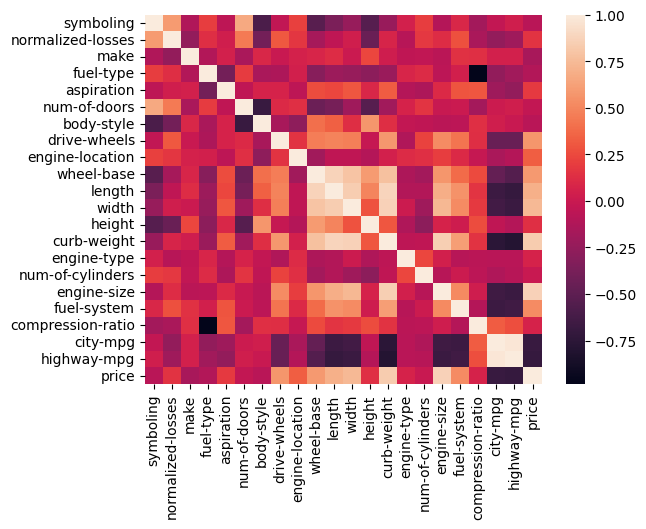

In [11]:
correlation = working_data.corr()
display(correlation)
seaborn.heatmap(correlation)

In [12]:
correlation.abs().unstack().sort_values(kind='quicksort', ascending=True)

price              num-of-cylinders     0.001484
num-of-cylinders   price                0.001484
width              make                 0.003783
make               width                0.003783
                   drive-wheels         0.004317
drive-wheels       make                 0.004317
num-of-doors       fuel-system          0.006980
fuel-system        num-of-doors         0.006980
highway-mpg        body-style           0.007170
body-style         highway-mpg          0.007170
num-of-cylinders   fuel-system          0.011970
fuel-system        num-of-cylinders     0.011970
engine-type        width                0.012298
width              engine-type          0.012298
engine-size        num-of-doors         0.013919
num-of-doors       engine-size          0.013919
                   city-mpg             0.014271
city-mpg           num-of-doors         0.014271
fuel-system        height               0.017046
height             fuel-system          0.017046
drive-wheels       h

In [36]:
selection = VarianceThreshold(threshold=(0.7))
selection.fit(working_data_no_price, working_data_price)
selected_data = selection.transform(working_data_no_price)
selected_features = selection.get_feature_names_out(working_data.columns[:len(working_data.columns)-1])
selected_data = pandas.DataFrame(selected_data, columns=selected_features)


display(pandas.DataFrame(selected_features))
display(selected_data)

,0
0,normalized-losses
1,make
2,body-style
3,wheel-base
4,length
5,width
6,height
7,curb-weight
8,engine-type
9,num-of-cylinders


,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,169.0,0,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27
1,169.0,0,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27
2,129.0,0,2,94.5,171.2,65.5,52.4,2823,5,3,152,5,9.0,154,5000,19,26
3,164.0,1,3,99.8,176.6,66.2,54.3,2337,3,2,109,5,10.0,102,5500,24,30
4,164.0,1,3,99.4,176.6,66.4,54.3,2824,3,1,136,5,8.0,115,5500,18,22
5,126.0,1,3,99.8,177.3,66.3,53.1,2507,3,1,136,5,8.5,110,5500,19,25
6,158.0,1,3,105.8,192.7,71.4,55.7,2844,3,1,136,5,8.5,110,5500,19,25
7,129.0,1,4,105.8,192.7,71.4,55.7,2954,3,1,136,5,8.5,110,5500,19,25
8,158.0,1,3,105.8,192.7,71.4,55.9,3086,3,1,131,5,8.3,140,5500,17,20
9,113.0,1,2,99.5,178.2,67.9,52.0,3053,3,1,131,5,7.0,160,5500,16,22


In [31]:
select_reg = SelectKBest(k=5, score_func=f_regression)
select_reg.fit(working_data_no_price, working_data_price)
selectedKBest_data = select_reg.transform(working_data_no_price)
selectedKBest_data.shape
kept_features = pandas.DataFrame({'columns': working_data_no_price.columns,
                              'Kept': select_reg.get_support()})

display(kept_features[(kept_features == True).any(axis=1)])
select_reg = SelectKBest(k=5, score_func=f_classif)
select_reg.fit(working_data_no_price, working_data_price)
selectedKBest_data = select_reg.transform(working_data_no_price)
selectedKBest_data.shape
kept_features = pandas.DataFrame({'columns': working_data_no_price.columns,
                              'Kept': select_reg.get_support()})
display(kept_features[(kept_features == True).any(axis=1)])

,columns,Kept
11,width,True
13,curb-weight,True
16,engine-size,True
21,horsepower,True
24,highway-mpg,True


/Users/dmytro/Documents/EducationFIT/4course/DSBD/data-science-labs-4course/env/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,columns,Kept
8,engine-location,True
11,width,True
13,curb-weight,True
15,num-of-cylinders,True
16,engine-size,True


/Users/dmytro/Documents/EducationFIT/4course/DSBD/data-science-labs-4course/env/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[2548, 130, 27],
       [2548, 130, 27],
       [2823, 152, 26],
       [2337, 109, 30],
       [2824, 136, 22],
       [2507, 136, 25],
       [2844, 136, 25],
       [2954, 136, 25],
       [3086, 131, 20],
       [3053, 131, 22],
       [2395, 108, 29],
       [2395, 108, 29],
       [2710, 164, 28],
       [2765, 164, 28],
       [3055, 164, 25],
       [3230, 209, 22],
       [3380, 209, 22],
       [3505, 209, 20],
       [1488, 61, 53],
       [1874, 90, 43],
       [1909, 90, 43],
       [1876, 90, 41],
       [1876, 90, 38],
       [2128, 98, 30],
       [1967, 90, 38],
       [1989, 90, 38],
       [1989, 90, 38],
       [2191, 98, 30],
       [2535, 122, 30],
       [2811, 156, 24],
       [1713, 92, 54],
       [1819, 92, 38],
       [1837, 79, 42],
       [1940, 92, 34],
       [1956, 92, 34],
       [2010, 92, 34],
       [2024, 92, 34],
       [2236, 110, 33],
       [2289, 110, 33],
       [2304, 110, 33],
       [2372, 110, 33],
       [2465, 110, 28],
       [2

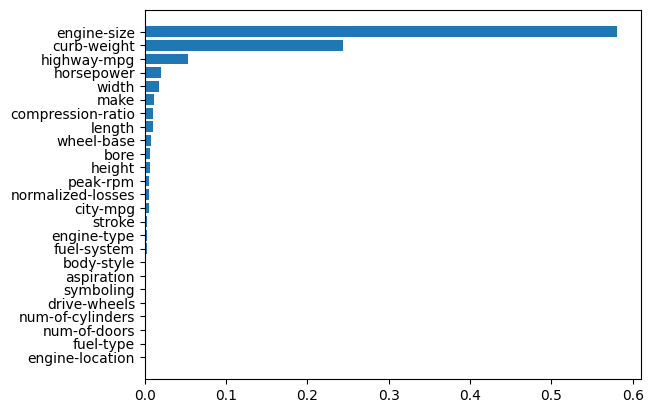

In [282]:
tree_classifier = RandomForestRegressor(n_estimators=100)
tree_classifier.fit(working_data_no_price, working_data_price)
model = SelectFromModel(tree_classifier, prefit=True)
forest_selected_data = model.transform(working_data_no_price)

display(forest_selected_data)

feature_importances = tree_classifier.feature_importances_
indices = np.argsort(feature_importances)
plt.yticks(range(len(indices)), np.array(working_data_no_price.columns)[indices])
plt.barh(range(len(indices)), feature_importances[indices])
plt.show()